In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

In [4]:
df = pd.read_excel("Date_Fruit_Datasets.xlsx")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [5]:
df.shape

(898, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [6]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [7]:
df.dtypes.value_counts()

float64    29
int64       5
object      1
dtype: int64

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder , LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix

In [30]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [31]:
X.shape , y.shape

((898, 34), (898,))

In [32]:
numerical_features = make_column_selector(dtype_include= np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

In [33]:
categorical_pipeline = make_pipeline(SimpleImputer( missing_values=None , strategy='most_frequent'),
                                     SimpleImputer(missing_values=np.nan , 
                                                            strategy='most_frequent'),OneHotEncoder()) 

In [34]:
numerical_pipeline = make_pipeline( SimpleImputer(strategy='mean'), StandardScaler())

In [35]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features) , 
                                       (categorical_pipeline, categorical_features))

In [36]:
X_scaled = preprocessor.fit_transform(X)
X_scaled # to large to be prined

array([[ 1.15563972,  0.78394219,  0.60450726, ...,  0.53834033,
         0.43559289, -0.02390791],
       [ 0.37169955,  0.06706714, -0.18747301, ..., -0.00354973,
         0.28411298, -0.02469438],
       [ 2.13226458,  1.4391311 ,  1.31912143, ...,  0.95889749,
         0.74233511,  0.3552428 ],
       ...,
       [-0.41017878, -0.31949739, -0.02304289, ..., -0.37064418,
        -0.56715228, -0.6589192 ],
       [-0.55362172, -0.36944589, -0.23728094, ...,  0.071247  ,
        -0.21883206, -0.22875922],
       [ 0.42446789,  0.56520261,  0.50723897, ..., -0.1705156 ,
        -0.71603977, -0.77948909]])

In [37]:
X_scaled.shape

(898, 34)

In [38]:
y_encoder = LabelEncoder()
y_encoder_target = y_encoder.fit_transform(y)
y_encoder_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoder_target, 
                                                    test_size = 0.2,  random_state = 5 )

In [42]:
print("train Set :" ,  X_train.shape)
print("test Set :" , X_test.shape)

train Set : (718, 34)
test Set : (180, 34)


In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_fruit = KNeighborsClassifier()

In [53]:
cross_val_score(model_fruit, X_train, y_train, cv = 5)

array([0.90277778, 0.85416667, 0.94444444, 0.85314685, 0.88111888])

In [54]:
cross_val_score(model_fruit, X_train, y_train, cv = 5).mean()

0.8871309246309245

In [55]:
model_fruit.fit(X_train , y_train)

KNeighborsClassifier()

In [57]:
model_fruit.score(X_test, y_test)

0.8777777777777778

In [58]:
y_pred = model_fruit.predict(X_test)

In [60]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.36      0.50      0.42        10
           2       1.00      0.89      0.94        45
           3       0.93      0.87      0.90        15
           4       0.94      0.97      0.96        35
           5       0.95      1.00      0.98        40
           6       0.74      0.71      0.72        24

    accuracy                           0.88       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.89      0.88      0.88       180



array([[ 9,  0,  0,  1,  0,  0,  1],
       [ 0,  5,  0,  0,  0,  1,  4],
       [ 0,  5, 40,  0,  0,  0,  0],
       [ 2,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  1],
       [ 0,  0,  0,  0,  0, 40,  0],
       [ 0,  4,  0,  0,  2,  1, 17]], dtype=int64)

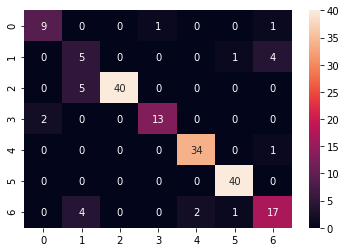

In [62]:
confusion_knn = confusion_matrix(y_test , y_pred)
sns.heatmap(confusion_knn, annot=True)
confusion_knn

In [73]:
# just to see what the encoded values are
y_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6])

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

## Now Support Vector Machine

In [64]:
from sklearn import svm

In [65]:
model_fruit_svm = svm.SVC()

In [66]:
cross_val_score(model_fruit_svm, X_train, y_train, cv = 5)

array([0.93055556, 0.88194444, 0.92361111, 0.87412587, 0.90909091])

In [67]:
cross_val_score(model_fruit_svm, X_train, y_train, cv = 5).mean()

0.9038655788655788

In [68]:
model_fruit_svm.fit(X_train , y_train)

SVC()

In [69]:
model_fruit_svm.score(X_test, y_test)

0.9166666666666666

In [74]:
y_pred = model_fruit_svm.predict(X_test)

In [75]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.45      0.50      0.48        10
           2       0.98      0.91      0.94        45
           3       1.00      1.00      1.00        15
           4       1.00      0.94      0.97        35
           5       0.97      0.97      0.97        40
           6       0.76      0.92      0.83        24

    accuracy                           0.92       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.93      0.92      0.92       180



In [76]:
param_grid = {
    "svc_C" : [1, 5, 10, 50],
    "svc_gamma" : [0.001 , 0.0005, 0.001 , 0.005]
}

In [80]:
grid_fruit = GridSearchCV(svm.SVC(), param_grid, cv = 5)

In [81]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [82]:
svm.SVC().get_params().values()

dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, None, True, 0.001, False])

In [ ]:
grid_fruit.

In [91]:
print(grid_fruit.score) 

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'svc_C': [1, 5, 10, 50],
                         'svc_gamma': [0.001, 0.0005, 0.001, 0.005]})>


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model_log = LogisticRegression()

In [96]:
cross_val_score(model_log, X_train, y_train, cv = 5)

C:\ANACONDA\Boris_Tondjua\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ANACONDA\Boris_Tondjua\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.93055556, 0.91666667, 0.9375    , 0.86713287, 0.9020979 ])

In [97]:
cross_val_score(model_log, X_train, y_train, cv = 5).mean()

C:\ANACONDA\Boris_Tondjua\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ANACONDA\Boris_Tondjua\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9107905982905983

In [98]:
model_log.fit (X_train , y_train)

C:\ANACONDA\Boris_Tondjua\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
model_log.score(X_test , y_test)

0.9388888888888889

In [100]:
y_pred = model_log.predict(X_test)

In [101]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.62      0.50      0.56        10
           2       0.98      0.93      0.95        45
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        35
           5       0.95      0.97      0.96        40
           6       0.85      0.96      0.90        24

    accuracy                           0.94       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.94      0.94      0.94       180



In [102]:
model_random = RandomForestClassifier()

In [103]:
model_random.fit(X_train , y_train)

RandomForestClassifier()

In [104]:
model_random.score(X_test , y_test)

0.9166666666666666

In [106]:
y_pred = model_random.predict(X_test)

In [107]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.46      0.60      0.52        10
           2       1.00      0.91      0.95        45
           3       0.94      1.00      0.97        15
           4       1.00      0.97      0.99        35
           5       1.00      0.97      0.99        40
           6       0.75      0.88      0.81        24

    accuracy                           0.92       180
   macro avg       0.88      0.88      0.87       180
weighted avg       0.93      0.92      0.92       180

